In [79]:
##running functions in Main_code
%run Main_code

# Defining used sport facility
lipastype = "1350"
lipasname = "jalkapallostadion"

# Fetching Lipas data
lipas_data = GetLipasData(lipastype,lipasname)

# Creating ykr-list
ykr_list = CreateYkrList(lipas_data)

# Formulate filepaths for travel time data
filepaths = FileFinder(ykr_list)

# Join travel time files into YKR-grid and create a single geodataframe with minimum travel times
geodata = TableJoiner(filepaths)

geodata.head()

Processing file data/HelsinkiTravelTimeMatrix2018/5936xxx/travel_times_to_ 5936682.txt. Progress: 1/4
Processing file data/HelsinkiTravelTimeMatrix2018/5967xxx/travel_times_to_ 5967140.txt. Progress: 2/4
Processing file data/HelsinkiTravelTimeMatrix2018/5961xxx/travel_times_to_ 5961882.txt. Progress: 3/4
Processing file data/HelsinkiTravelTimeMatrix2018/5900xxx/travel_times_to_ 5900202.txt. Progress: 4/4


,x,y,YKR_ID,geometry,walk_t_0,bike_s_t_0,bike_f_t_0,pt_r_t_0,pt_m_t_0,car_r_t_0,...,pt_m_t_3,car_r_t_3,car_m_t_3,min_t_bike_f,min_t_bike_s,min_t_car_r,min_t_car_m,min_t_pt_r,min_t_pt_m,min_t_walk
0,381875.0,6697880.0,5785640,"POLYGON ((382000.000 6697750.000, 381750.000 6...",411.0,118.0,74.0,130.0,146.0,52.0,...,112,40.0,35.0,54.0,84.0,40.0,35.0,104.0,112.0,293.0
1,382125.0,6697880.0,5785641,"POLYGON ((382250.000 6697750.000, 382000.000 6...",392.0,121.0,77.0,133.0,140.0,54.0,...,110,43.0,37.0,53.0,83.0,43.0,37.0,107.0,110.0,256.0
2,382375.0,6697880.0,5785642,"POLYGON ((382500.000 6697750.000, 382250.000 6...",393.0,121.0,77.0,134.0,142.0,54.0,...,111,43.0,37.0,53.0,83.0,43.0,37.0,108.0,111.0,258.0
3,382625.0,6697880.0,5785643,"POLYGON ((382750.000 6697750.000, 382500.000 6...",397.0,130.0,82.0,138.0,146.0,55.0,...,116,43.0,37.0,58.0,92.0,43.0,37.0,113.0,116.0,262.0
4,381125.0,6697630.0,5787544,"POLYGON ((381250.000 6697500.000, 381000.000 6...",404.0,115.0,73.0,123.0,139.0,51.0,...,105,40.0,35.0,52.0,81.0,40.0,35.0,97.0,105.0,286.0


In [80]:
# Saving minimum travel times of each travel method to tiff-raster in outputs folder
GeodataframeToTiff(geodata, lipastype, lipasname)

Files saved.


In [77]:
# Tässä alla vielä erikseen make_geocube tuotokset plotattuna - ei merkittävä, voi poistaa tieltä
from geocube.api.core import make_geocube

# määritellään mistä attribuuteista tehdään rasterit
attr_list = ["min_t_bike_f", "min_t_bike_s","min_t_pt_r","min_t_pt_m","min_t_car_r","min_t_car_m", "min_t_walk"]
    
# luodaan geocube 250m spat.resoluutiolle
cube = make_geocube(vector_data=geodata, measurements= attr_list, resolution=(250, -250))

'outputs/traveltimesmin_t_bike_f.png'

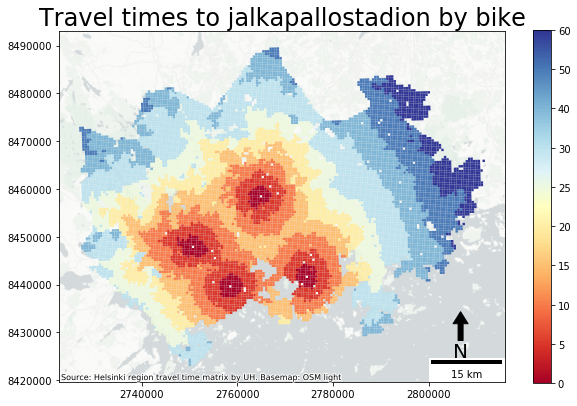

In [81]:
Visualiser(geodata, "min_t_bike_f", lipasname)

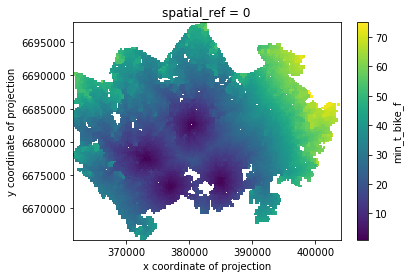

In [55]:
cube.min_t_bike_f.plot()

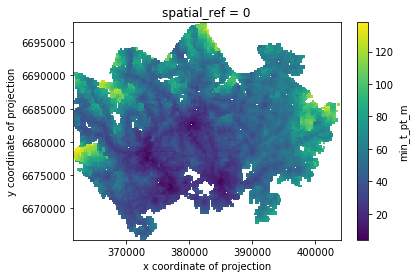

In [29]:
cube.min_t_pt_m.plot()

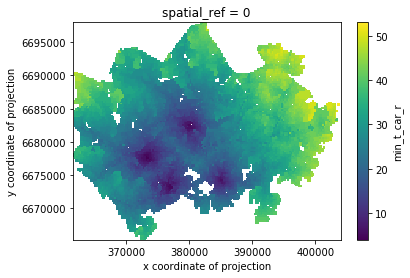

In [30]:
cube.min_t_car_r.plot()